In [63]:
#allthough this is not the best data to analyse i just want to try to work with these modules i just learned

import pandas as pd # to look at the datasets
from sklearn.metrics import mean_absolute_error # to for test and validation
from sklearn.tree import DecisionTreeRegressor # for the decisiontree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sales = pd.read_csv('store_sales.csv')

sales.head()

,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0


In [8]:
#looking for missing values
count = sales['sales'].isnull().sum() # make function that can check the collumn for missing values
print(f'There are "{count}" missing values')

There are "0" missing values


In [9]:
#prediction target aka "y"
y = sales.sales

In [ ]:
#feautures
sales_features = ['store','promo','holiday']
X = sales[sales_features]

In [12]:
sales_model = DecisionTreeRegressor(random_state=1)
sales_model.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
modeloutput = sales_model.predict(X.head()) 
modeloutput

array([223.4732696 , 223.4732696 , 223.4732696 , 251.42137931,
       223.4732696 ])

In [31]:
# Getting the difference between the
X_output = sales.sales # to get the original data
X_S = pd.Series(X_output.head()) #for X series
print(modeloutput - X_S) # get the diffrence in


0    38.693270
1    30.853270
2    10.793270
3     1.841379
4    -0.026730
Name: sales, dtype: float64


In [41]:
#making the dates into dates
import datetime

In [53]:
sales['date'] = pd.to_datetime(sales['date'], format="%Y-%m-%d")

In [ ]:
sales['predicted'] = sales_model.predict(X) # adds the new values inoto the original dataframe
sales.head()

,date,store,sales,promo,holiday,dates,predicted
0,2022-01-01,1,184.78,0,0,2022-01-01,223.473270
1,2022-01-02,1,192.62,0,0,2022-01-02,223.473270
2,2022-01-03,1,212.68,0,0,2022-01-03,223.473270
3,2022-01-04,1,249.58,1,0,2022-01-04,251.421379
4,2022-01-05,1,223.50,0,0,2022-01-05,223.473270


Text(0.5, 1.0, 'Predicted and original sales')

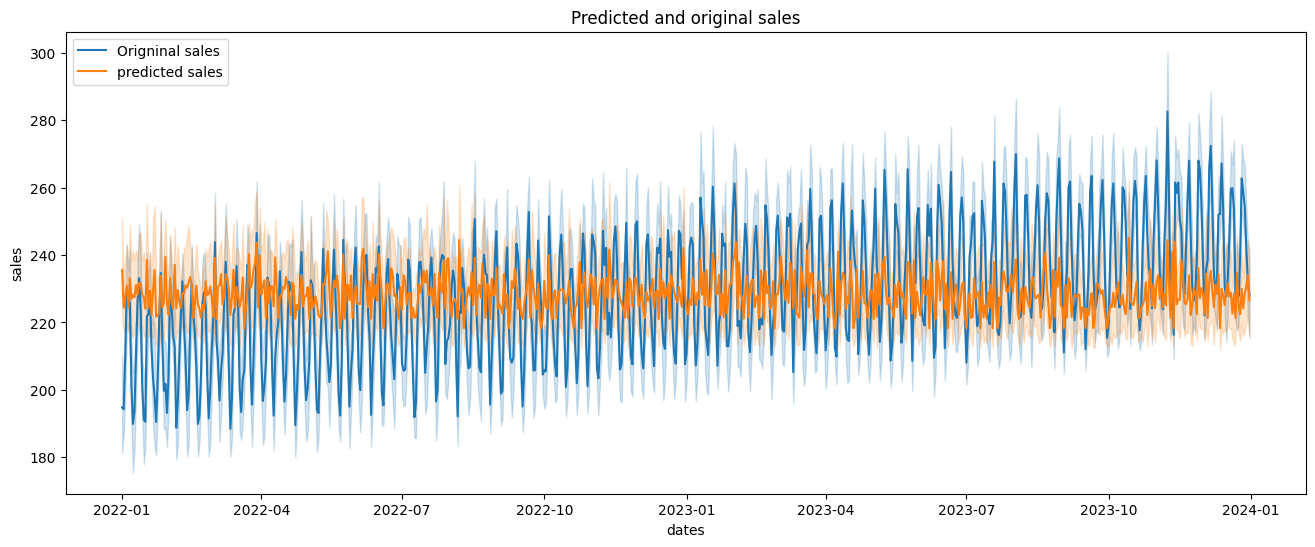

In [57]:
# trying to plot the the thing
plt.figure(figsize=(16,6))
sns.lineplot(data=sales, x='dates', y='sales', label='Origninal sales')
sns.lineplot(data=sales, x='dates', y='predicted', label='predicted sales')
plt.title('Predicted and original sales')


 we can see taht the predicted dosent account for growth over time and it sales stays consistent

Now to do the same on a test and normal set

In [75]:
#MAE for the normal set
predictedsales = sales_model.predict(X)
print(f'the MAE is {mean_absolute_error(y, predictedsales)}')

the MAE is 15.105621231148927


In [ ]:
#trying to see if the randomforest is better
from sklearn.ensemble import RandomForestRegressor
forestmodel = RandomForestRegressor(random_state=1, max_leaf_nodes=100)
forestmodel.fit(X,y)
forestpredict = forestmodel.predict(X)
print(f'the MAE is {mean_absolute_error(y, forestpredict)}')

the MAE is 15.257633806946327
